# Brainrex Crypto Sentiment - Quickstart
## We will learn how to install and use the sentiment API library. For python 



<img src="https://s3-eu-west-1.amazonaws.com/brainrex.com/img/products/sentiment-analysis-quickstart-brainrex-api.png">
Investor Sentiment Analysis
Audience
This tutorial is designed to let you quickly start exploring and developing applications with the BrainrexNatural Language API. 

This tutorial steps through a Natural Language API application using Python code. The purpose here is not to explain the Python client libraries, but to explain how to make calls to the Natural Language API. Applications in Java and Node.js are essentially similar. Consult the Natural Language API Samples for samples in other languages (including this sample within the tutorial).

## Prerequisites
In order to run this tutorial you need to do the following:
- You've installed the Brainrex Language Client for Python
- You have signed up for the Brainrex Free tier.
- You have created API keys 
- Store API keys as enviroment variables.
- Basic familiarity with Python programming.
- Set up your Python development environment. It is recommended that you have the latest version of Python 3.8.0, pip, and -virtualenv installed on your system.


In [1]:
!pip install brainrex

You are using pip version 19.0.3, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [4]:
### Making your first call quickstart 
from __future__ import print_function
import time
import brainrex
from brainrex.rest import ApiException
from pprint import pprint

# Go to console.brainrex.com/signup > APIs > Subcribe to an API > Dashboard > API Key > Copy
# Configure API key authorization: APIKeyHeader
configuration = brainrex.Configuration()
configuration.api_key['x-api-key'] = 'INSERT_YOUR_API_KEY_HERE' # Paste key here

# create an instance of the API class
api_instance = brainrex.LanguageApi(brainrex.ApiClient(configuration))
text = brainrex.Text("bitcoin is the best") # Text | String of text to be analyze for investor sentiment.

try:
    # Sentiment analysis score using a model trained for buy signals.
    api_response = api_instance.language_get_price_sentiment(text)
    pprint(api_response)
except ApiException as e:
    print("Exception when calling LanguageApi->language_get_price_sentiment: %s\n" % e)


'0.08454512209485064'


## Your first call to the General Sentiment API

In [5]:
try:
    # Sentiment analysis score using a model trained for buy signals.
    api_response = api_instance.language_get_general_sentiment(text)
    pprint(api_response)
except ApiException as e:
    print("Exception when calling LanguageApi->language_get_price_sentiment: %s\n" % e)

'1.0'


## Lets download a sample dataset we provide 

In [6]:
import pandas as pd 

tweets_dataframe = pd.read_csv('https://s3-eu-west-1.amazonaws.com/brainrex.com/data/sample_text_data.csv')
tweetList= tweets_dataframe.Tweet.to_list()
tweetList[:5]

for index, tweet in enumerate(tweetList[344:366]): # Change the number of posts you want to analyze by changing this values. [start:end]
    try:
        text = brainrex.Text(tweet)
        investor_score = api_instance.language_get_price_sentiment(text)
        sentiment_score = api_instance.language_get_general_sentiment(text)
        # TODO add response
        print('Sentence {} investor score of {}, general sentiment score {}'.format(index, investor_score, sentiment_score))

    except ApiException as e:
        print("Exception when calling LanguageApi->language_get_price_sentiment: %s\n" % e)


Sentence 0 investor score of 0.06774486518400419, general sentiment score 0.0625
Sentence 1 investor score of -0.023371146553828354, general sentiment score -0.13888888888888887
Sentence 2 investor score of 0.2202054815751009, general sentiment score -0.3
Sentence 3 investor score of 0.005077551770428797, general sentiment score 0.0
Sentence 4 investor score of -0.1202802390030504, general sentiment score -0.07142857142857142
Sentence 5 investor score of 0.08182042959249008, general sentiment score 0.0


KeyboardInterrupt: 

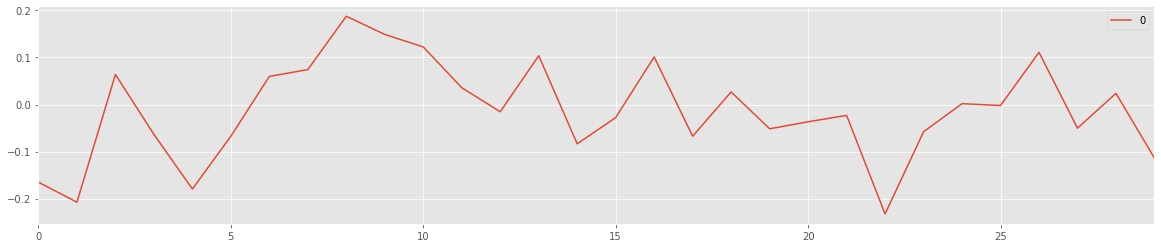

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
res = []
for tweet in tweetList[:30]: # Change the number of posts you want to analyze by changing this values. [start:end]
    try:
        text = brainrex.Text(tweet)
        api_response = api_instance.language_get_price_sentiment(text)
        res.append(api_response)
    except ApiException as e:
        print("Exception when calling LanguageApi->language_get_price_sentiment: %s\n" % e)
# Plot the results from the sentiment scores.
series = pd.DataFrame(res)
series=series.astype(float)
plt.style.use('ggplot')
series.plot(figsize=(20,4))